In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/sample_data/train.csv')

In [3]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df[class_names].apply(lambda x: x.value_counts())

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,144277,157976,151122,159093,151694,158166
1,15294,1595,8449,478,7877,1405


In [6]:
df[class_names].apply(lambda x: x.value_counts(normalize=True))

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.904156,0.990004,0.947052,0.997004,0.950636,0.991195
1,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

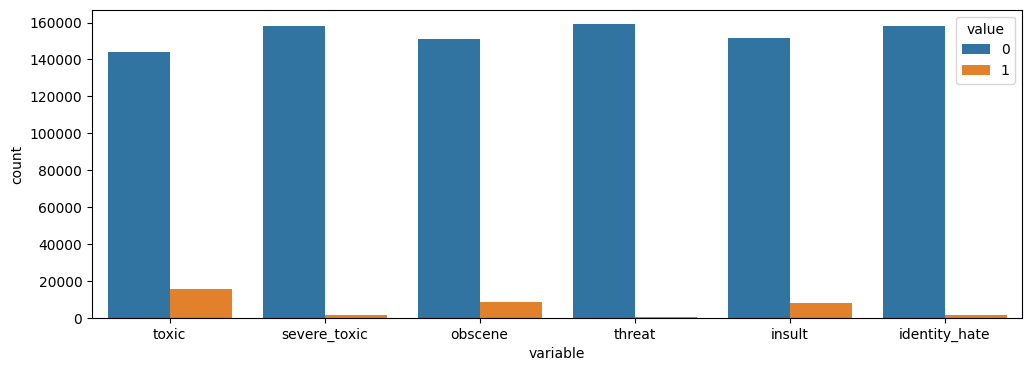

In [8]:
# We see that less than 10% are marked toxic

# plot the chart out for better visualization

plt.figure(figsize=(12,4))
sns.countplot(x="variable", hue="value", data=pd.melt(df[class_names]))

plt.show()

In [9]:
# Extract and combine all comments flagged as "Toxic
toxic_df = df[df["toxic"] == 1]
toxic_df = toxic_df["comment_text"].reset_index(drop=True)

toxic_text = ""

for i in range(len(toxic_df)):
    toxic_text += " " + toxic_df[i]
    
toxic_text[:100]

' COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK Hey... what is it..\n@ | talk .\nWhat is it... an exclus'

In [10]:
import re

In [11]:
tokens = re.findall(r'\w+', toxic_text)
print("Number of toxic tokens = "+"{:,}\n".format(len(tokens)))
print(tokens[:50])

Number of toxic tokens = 815,264

['COCKSUCKER', 'BEFORE', 'YOU', 'PISS', 'AROUND', 'ON', 'MY', 'WORK', 'Hey', 'what', 'is', 'it', 'talk', 'What', 'is', 'it', 'an', 'exclusive', 'group', 'of', 'some', 'WP', 'TALIBANS', 'who', 'are', 'good', 'at', 'destroying', 'self', 'appointed', 'purist', 'who', 'GANG', 'UP', 'any', 'one', 'who', 'asks', 'them', 'questions', 'abt', 'their', 'ANTI', 'SOCIAL', 'and', 'DESTRUCTIVE', 'non', 'contribution', 'at', 'WP']


In [12]:
from collections import Counter

In [13]:
# Remove stop words. Ex: silver or gold becomes: silver gold 

import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english') # All English Stopwords
#stop_words = set(stopwords.words('english'))

tokens = [t.lower() for t in tokens if t.lower() not in stop_words]
print(Counter(tokens).most_common(50))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('fuck', 9934), ('wikipedia', 3678), ('shit', 3622), ('like', 3512), ('nigger', 3300), ('fucking', 3289), ('suck', 3235), ('ass', 2939), ('u', 2866), ('go', 2865), ('hate', 2631), ('get', 2300), ('gay', 2239), ('know', 2201), ('page', 2147), ('die', 2082), ('faggot', 2017), ('fat', 1970), ('people', 1873), ('moron', 1862), ('bitch', 1785), ('hi', 1691), ('cunt', 1540), ('one', 1529), ('sucks', 1443), ('stupid', 1439), ('wiki', 1436), ('stop', 1420), ('talk', 1402), ('article', 1394), ('pig', 1355), ('jew', 1350), ('dick', 1303), ('user', 1264), ('penis', 1239), ('think', 1236), ('want', 1220), ('bullshit', 1139), ('life', 1089), ('block', 1089), ('time', 1064), ('asshole', 1042), ('wanker', 1035), ('dont', 1031), ('would', 1021), ('fag', 1012), ('even', 1007), ('bark', 1001), ('balls', 999), ('right', 959)]


In [14]:
from wordcloud import WordCloud

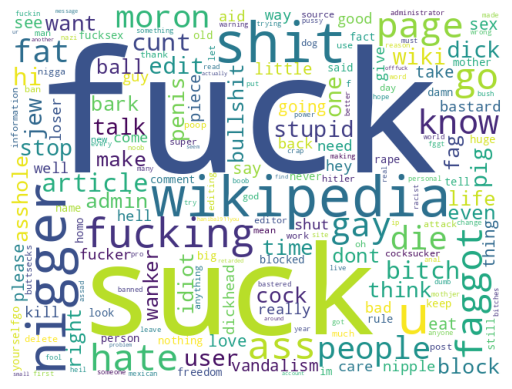

In [15]:
text_wordcloud = " ".join(tokens)
cloud = WordCloud(background_color="white", width=640, height=480, collocations = False).generate(text_wordcloud)

plt.imshow(cloud)
plt.axis("off")
plt.show()

In [16]:
s_toxic_df = df[df["severe_toxic"] == 1]
s_toxic_df = s_toxic_df["comment_text"].reset_index(drop=True)
s_toxic_text = ""
for i in range(len(toxic_df)):
    s_toxic_text += " " + toxic_df[i]


some_frac_total_text = toxic_text + s_toxic_text 
print("Characters = "+"{:,}".format(len(some_frac_total_text)))
print("Words = "+"{:,}".format(len(some_frac_total_text.split())))
print("Unique words from first two = "+"{:,}".format(len(set(some_frac_total_text.split()))))

Characters = 9,061,574
Words = 1,568,852
Unique words from first two = 73,682


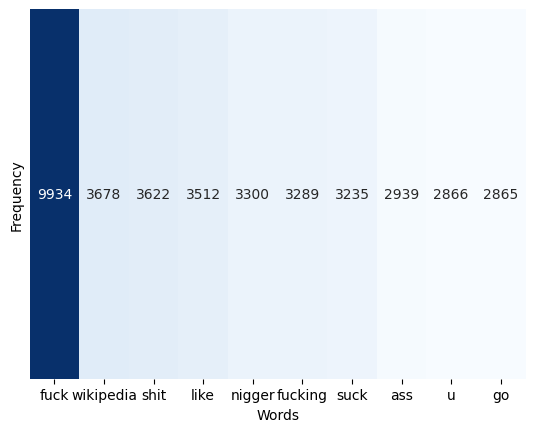

In [23]:
# Get frequency of each word
word_freq = Counter(tokens)
# Get top 50 words by frequency
top_words = [x[0] for x in word_freq.most_common(10)]
# Create matrix of word frequencies
matrix = [[word_freq[w] for w in top_words]]
# Create heatmap
sns.heatmap(matrix, cmap='Blues', xticklabels=top_words, yticklabels=False, annot=True, fmt='d', cbar=False)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


In [25]:
from nltk.util import ngrams

# Generate bigrams
bigrams = ngrams(tokens, 2)

# Print the top 10 most common bigrams
print(Counter(bigrams).most_common(10))

[(('fuck', 'fuck'), 2140), (('nigger', 'nigger'), 2015), (('moron', 'hi'), 1475), (('hi', 'moron'), 1472), (('hate', 'hate'), 1419), (('pig', 'pig'), 1250), (('jew', 'fat'), 1234), (('fat', 'jew'), 1226), (('shit', 'shit'), 1150), (('go', 'fuck'), 1147)]


In [26]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Set up the bigram collocation finder
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)

# Filter collocations by frequency and return the top 10
top_collocations = finder.nbest(bigram_measures.raw_freq, 10)

# Print the top 10 collocations
for collocation in top_collocations:
    print(collocation)


('fuck', 'fuck')
('nigger', 'nigger')
('moron', 'hi')
('hi', 'moron')
('hate', 'hate')
('pig', 'pig')
('jew', 'fat')
('fat', 'jew')
('shit', 'shit')
('go', 'fuck')


In [33]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder

# Create trigram collocation finder object
tcf = TrigramCollocationFinder.from_words(tokens)

# Define measure to find trigram collocations
tcm = TrigramAssocMeasures()

# Find top 10 trigrams by PMI
trigrams_pmi = tcf.nbest(tcm.pmi, 50)

print(trigrams_pmi)




[('04980', 'ifjvo', 'fgieroifgegjio'), ('0f', 'sukhoi_su', '27_operators'), ('0therf', 'uck1ng', '5cum_bag'), ('1086757', '_all_with_theories_to_sell_carleton_s', '_coon_bentley_glass_marston_bates_and_the_struggle_by_life_scientists_in_the_united_states_to_construct_a_social_mission_after_world_war_ii'), ('11709', 'hayseed', 'dixie'), ('153163814', 'mytoken', 'a9b1bd03'), ('16yrold', '12yrold', '3yrold'), ('1828', 'typhus', 'complication'), ('1894', 'nicolas', 'notovitch'), ('20people', 'mulla', '20sadra'), ('2230', '10092', '1j8j2j1j0j3j1j1j1j1'), ('24601', 'inspector', 'javert'), ('2526a', '253d216536', '2526po'), ('253d216520', '2526a', '253d216536'), ('253d216536', '2526po', '253d62'), ('2871', '4cc6', 'a4e9'), ('28f0', '508d', '35a5'), ('2c_arrogant', '2c_nasty', '2c_and_rude'), ('304', 'cfe0', 'fa09'), ('306', 'bd61', 'e0f0'), ('35a5', '655a', 'bec8'), ('38ass', 'fuck43', '3go'), ('415', '839', '6885'), ('4cc6', 'a4e9', '27811447e751'), ('508d', '35a5', '655a'), ('589yjq', 'eori